Find the trend on the bag’s production from the data. You must provide a mathematical model that can explain the production’s trend accurately. Since your supervisor want an accurate model, you must avoid any linear approach to build the trend model.

Coefficients (3-digit precision):
a0: 0.004, a1: -0.134, a2: 47.224, a3: 1748.507
R^2: 0.996, MSE: 83195.127


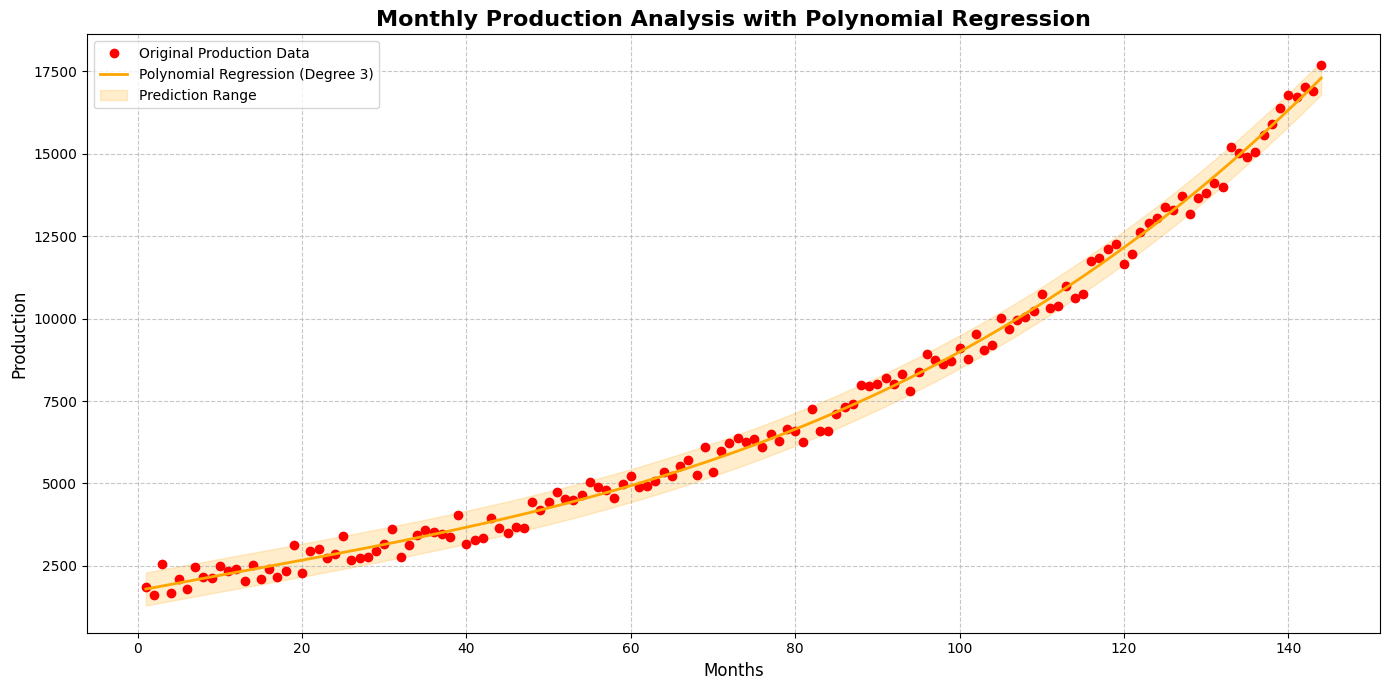

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Data matrix as given in the problem
data_matrix = np.array([
    ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72', 'M73', 'M74', 'M75', 'M76', 'M77', 'M78', 'M79', 'M80', 'M81', 'M82', 'M83', 'M84', 'M85', 'M86', 'M87', 'M88', 'M89', 'M90', 'M91', 'M92', 'M93', 'M94', 'M95', 'M96', 'M97', 'M98', 'M99', 'M100', 'M101', 'M102', 'M103', 'M104', 'M105', 'M106', 'M107', 'M108', 'M109', 'M110', 'M111', 'M112', 'M113', 'M114', 'M115', 'M116', 'M117', 'M118', 'M119', 'M120', 'M121', 'M122', 'M123', 'M124', 'M125', 'M126', 'M127', 'M128', 'M129', 'M130', 'M131', 'M132', 'M133', 'M134', 'M135', 'M136', 'M137', 'M138', 'M139', 'M140', 'M141', 'M142', 'M143', 'M144'],
    ['1863', '1614', '2570', '1685', '2101', '1811', '2457', '2171', '2134', '2502', '2358', '2399', '2048', '2523', '2086', '2391', '2150', '2340', '3129', '2277', '2964', '2997', '2747', '2862', '3405', '2677', '2749', '2755', '2963', '3161', '3623', '2768', '3141', '3439', '3601', '3531', '3477', '3376', '4027', '3175', '3274', '3334', '3964', '3649', '3502', '3688', '3657', '4422', '4197', '4441', '4736', '4521', '4485', '4644', '5036', '4876', '4789', '4544', '4975', '5211', '4880', '4933', '5079', '5339', '5232', '5520', '5714', '5260', '6110', '5334', '5988', '6235', '6365', '6266', '6345', '6118', '6497', '6278', '6638', '6590', '6271', '7246', '6584', '6594', '7092', '7326', '7409', '7976', '7959', '8012', '8195', '8008', '8313', '7791', '8368', '8933', '8756', '8613', '8705', '9098', '8769', '9544', '9050', '9186', '10012', '9685', '9966', '10048', '10244', '10740', '10318', '10393', '10986', '10635', '10731', '11749', '11849', '12123', '12274', '11666', '11960', '12629', '12915', '13051', '13387', '13309', '13732', '13162', '13644', '13808', '14101', '13992', '15191', '15018', '14917', '15046', '15556', '15893', '16388', '16782', '16716', '17033', '16896', '17689']
])

# Extract production data (second row) and convert to float
production_data = data_matrix[1, :].astype(float)  # Ignoring the header row
months = np.arange(1, len(production_data) + 1)  # Generate months from 1 to n

# Polynomial regression of degree 3 using numpy polyfit
coefficients = np.polyfit(months, production_data, 3)

# Display the polynomial coefficients with 3-digit precision
print("Coefficients (3-digit precision):")
print("a0: {:.3f}, a1: {:.3f}, a2: {:.3f}, a3: {:.3f}".format(coefficients[0], coefficients[1], coefficients[2], coefficients[3]))

# Generate fitted values using the polynomial coefficients
fitted_months = np.linspace(1, len(production_data), len(production_data))
fitted_production = np.polyval(coefficients, fitted_months)

# Compute R-squared and Mean Squared Error (MSE) for model evaluation
r2 = r2_score(production_data, np.polyval(coefficients, months))
mse = mean_squared_error(production_data, np.polyval(coefficients, months))
print(f"R^2: {r2:.3f}, MSE: {mse:.3f}")

# Plot the polynomial regression
plt.figure(figsize=(14, 7))
plt.plot(months, production_data, 'o', label='Original Production Data', color='red')  # Original data points
plt.plot(fitted_months, fitted_production, '-', label='Polynomial Regression (Degree 3)', color='orange', linewidth=2)  # Regression curve
plt.fill_between(fitted_months, fitted_production - 500, fitted_production + 500, color='orange', alpha=0.2, label='Prediction Range')  # Confidence band
plt.xlabel('Months', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.title('Monthly Production Analysis with Polynomial Regression', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


A third-degree polynomial regression approach was chosen because it effectively captures the non-linear patterns in monthly production data, which cannot be explained by a linear model. This model is flexible and suitable for representing fluctuations and complex long-term trends. Evaluation using R² and MSE ensures high accuracy, while visualization helps validate the model's fit to the data. This method is efficient, easy to implement, and meets the requirement to avoid a linear approach.